In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

# Increase graph quality
mpl.rcParams['figure.dpi']= 600

In [2]:
df = pd.read_csv('base_attack_regression.csv', sep=';')
df2 = pd.read_csv('base_attack_regression_92-130.csv', sep=';')

df = pd.concat([df, df2])

df.tail()

,Nb similar docs,Nb server docs,Similar/Server voc size,Nb queries seen,Nb queries known,Base acc
2995,12044,18065,130,1257,60,0.600668
2996,12044,18065,130,1257,60,0.547201
2997,12044,18065,130,1257,60,0.576441
2998,12044,18065,130,1257,60,0.581454
2999,12044,18065,130,1257,60,0.612364


In [3]:
df_15_known_queries = df.loc[df['Nb queries known'] == 15]
df_30_known_queries = df.loc[df['Nb queries known'] == 30]
df_60_known_queries = df.loc[df['Nb queries known'] == 60]

df_30_known_queries.head()

,Nb similar docs,Nb server docs,Similar/Server voc size,Nb queries seen,Nb queries known,Base acc
50,12044,18065,46,155,30,0.864
51,12044,18065,46,155,30,0.880
52,12044,18065,46,155,30,0.920
53,12044,18065,46,155,30,0.768
54,12044,18065,46,155,30,0.856


In [4]:
df_15_acc = df_15_known_queries.groupby('Similar/Server voc size')['Base acc'].mean()
df_15_min = df_15_known_queries.groupby('Similar/Server voc size')['Base acc'].min()
df_15_max = df_15_known_queries.groupby('Similar/Server voc size')['Base acc'].max()

df_30_acc = df_30_known_queries.groupby('Similar/Server voc size')['Base acc'].mean()
df_30_min = df_30_known_queries.groupby('Similar/Server voc size')['Base acc'].min()
df_30_max = df_30_known_queries.groupby('Similar/Server voc size')['Base acc'].max()

df_60_acc = df_60_known_queries.groupby('Similar/Server voc size')['Base acc'].mean()
df_60_min = df_60_known_queries.groupby('Similar/Server voc size')['Base acc'].min()
df_60_max = df_60_known_queries.groupby('Similar/Server voc size')['Base acc'].max()


In [5]:
df_15_acc.tail()

Similar/Server voc size
122    0.183535
124    0.168227
126    0.171612
128    0.163704
130    0.165668
Name: Base acc, dtype: float64

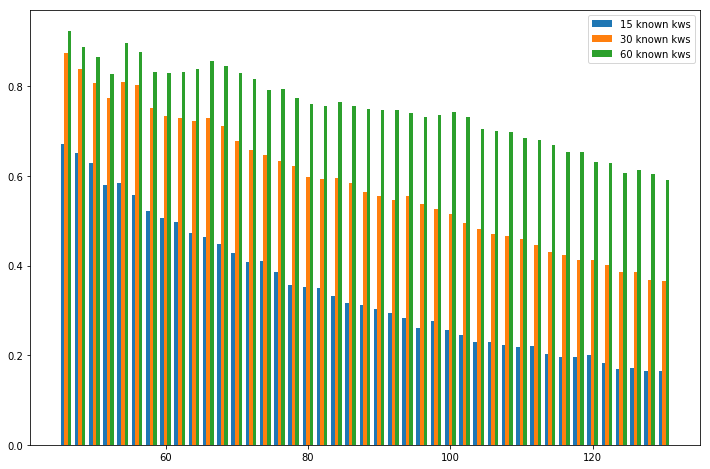

In [6]:
xs = np.array(list(range(46, 131, 2)))

width = 0.5

plt.rcParams["figure.figsize"] = (12,8)

plt.bar(xs - width, df_15_acc, width, label="15 known kws")
plt.bar(xs, df_30_acc, width, label="30 known kws")
plt.bar(xs + width, df_60_acc, width, label="60 known kws")
plt.legend()
plt.show()

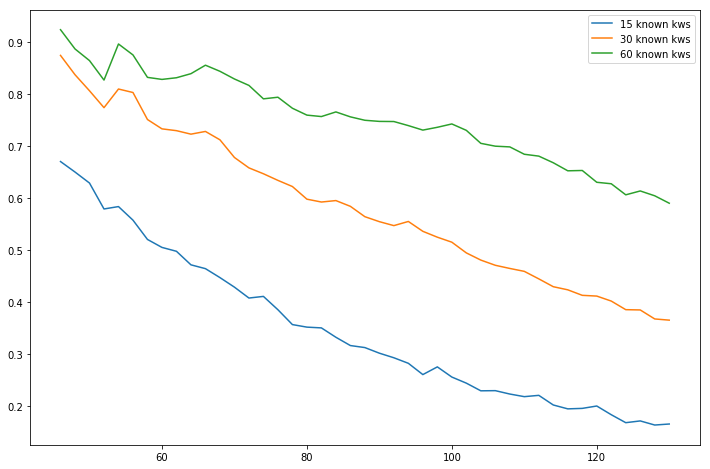

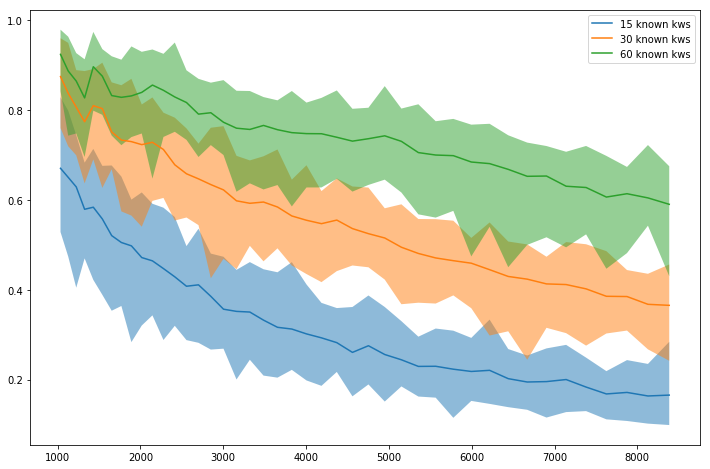

In [7]:
xs = np.array(list(range(46, 131, 2)))

xs = [x*(x+1)/2-x for x in xs]

plt.plot(df_15_acc, label="15 known kws")
# plt.fill_between(x=xs, y1=df_15_min, y2=df_15_max, alpha=0.5)

plt.plot(df_30_acc, label="30 known kws")
# plt.fill_between(x=xs, y1=df_30_min, y2=df_30_max, alpha=0.5)

plt.plot(df_60_acc, label="60 known kws")
# plt.fill_between(x=xs, y1=df_60_min, y2=df_60_max, alpha=0.5, color='black')

plt.legend()
plt.show()

plt.plot(xs, df_15_acc, label="15 known kws")
plt.fill_between(x=xs, y1=df_15_min, y2=df_15_max, alpha=0.5)

plt.plot(xs, df_30_acc, label="30 known kws")
plt.fill_between(x=xs, y1=df_30_min, y2=df_30_max, alpha=0.5)

plt.plot(xs, df_60_acc, label="60 known kws")
plt.fill_between(x=xs, y1=df_60_min, y2=df_60_max, alpha=0.5)

plt.legend()
plt.show()

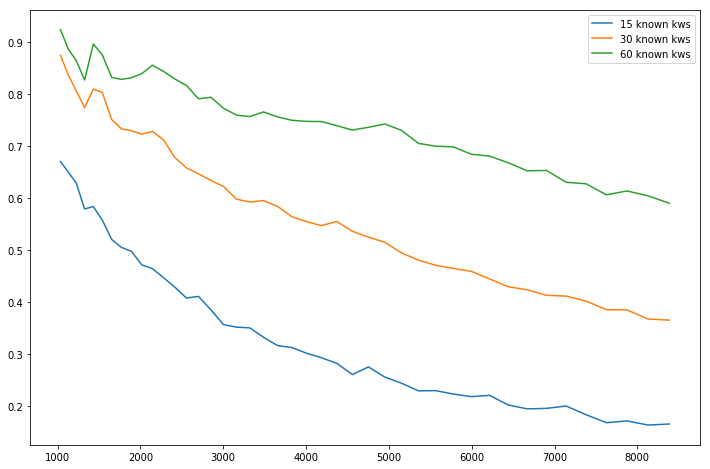

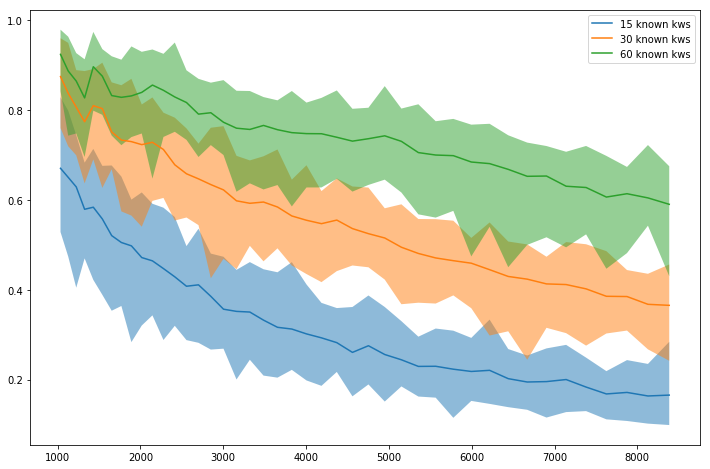

In [8]:
xs = np.array(list(range(46, 131, 2)))

xs = [x*(x+1)/2-x for x in xs]
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(xs, df_15_acc, label="15 known kws")
# plt.fill_between(x=xs, y1=df_15_min, y2=df_15_max, alpha=0.5)

plt.plot(xs, df_30_acc, label="30 known kws")
# plt.fill_between(x=xs, y1=df_30_min, y2=df_30_max, alpha=0.5)

plt.plot(xs, df_60_acc, label="60 known kws")
# plt.fill_between(x=xs, y1=df_60_min, y2=df_60_max, alpha=0.5, color='black')

plt.legend()
plt.show()

plt.plot(xs, df_15_acc, label="15 known kws")
plt.fill_between(x=xs, y1=df_15_min, y2=df_15_max, alpha=0.5)

plt.plot(xs, df_30_acc, label="30 known kws")
plt.fill_between(x=xs, y1=df_30_min, y2=df_30_max, alpha=0.5)

plt.plot(xs, df_60_acc, label="60 known kws")
plt.fill_between(x=xs, y1=df_60_min, y2=df_60_max, alpha=0.5)

plt.legend()
plt.show()

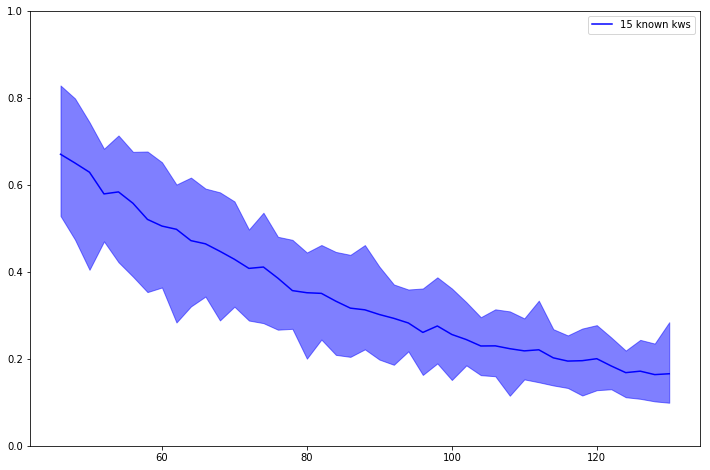

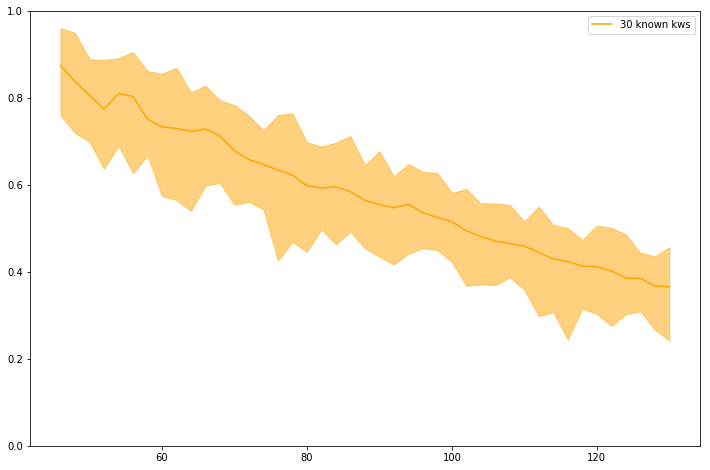

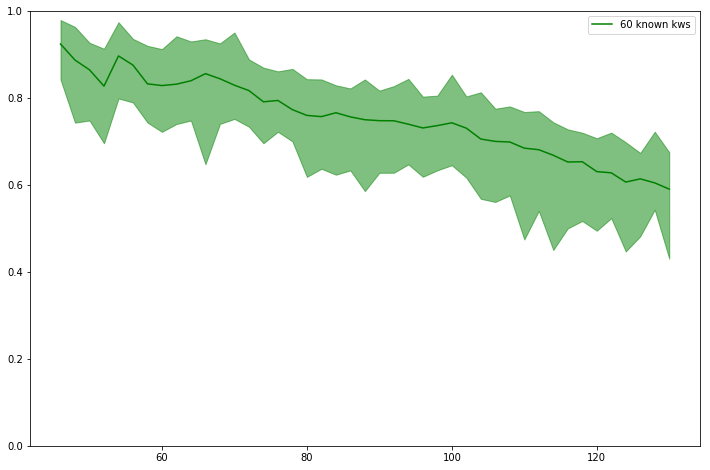

In [9]:
xs = np.array(list(range(46, 131, 2)))

plt.plot(df_15_acc, label="15 known kws", color='blue')
plt.fill_between(x=xs, y1=df_15_min, y2=df_15_max, alpha=0.5, color='blue')
plt.ylim(top=1.0, bottom=0.0)
plt.legend()
plt.show()

plt.plot(df_30_acc, label="30 known kws", color='orange')
plt.fill_between(x=xs, y1=df_30_min, y2=df_30_max, alpha=0.5, color='orange')
plt.ylim(top=1.0, bottom=0.0)
plt.legend()
plt.show()

plt.plot(df_60_acc, label="60 known kws", color='green')
plt.fill_between(x=xs, y1=df_60_min, y2=df_60_max, alpha=0.5, color='green')
plt.ylim(top=1.0, bottom=0.0)
plt.legend()
plt.show()

[46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130]


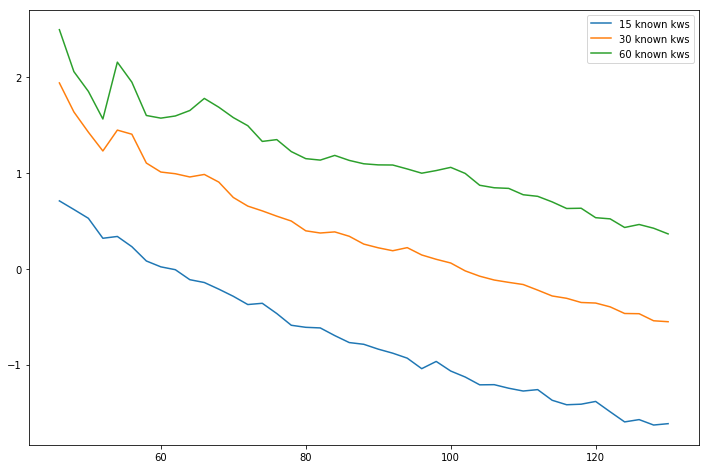

In [10]:
xs = list(range(46, 131, 2))
print(xs)

def func(x,L,c,k):
    return L/ (1 + c*np.exp(-k*x))


def logit(p):
    return np.log(p/(1-p))


def inverse_logit(p):
    return 1 / (1 + np.exp(-p))

plt.plot(xs, logit(df_15_acc), label="15 known kws")
plt.plot(xs, logit(df_30_acc), label="30 known kws")
plt.plot(xs, logit(df_60_acc), label="60 known kws")
plt.legend()
plt.show()

In [11]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

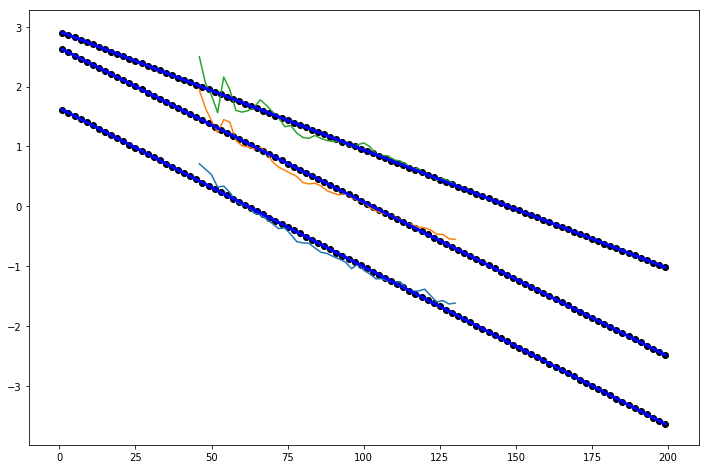

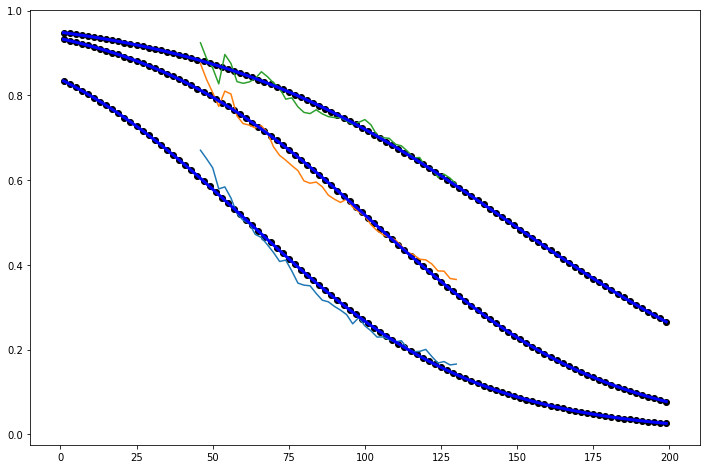

In [12]:
xs = list(range(46, 131, 2))
xs_test = list(range(1, 201, 2))

nb_test = 7
nb_train = len(xs) - nb_test

# Last data points
dataset_X_train = np.array(xs).reshape(-1, 1)

# First data points
dataset_X_test = np.array(xs_test).reshape(-1, 1)

# print(f"Training data set X: {dataset_X_train}")
# print(f"Test data set X: {dataset_X_test}")

for dataset, nb_known in [(df_15_acc, '15'), (df_30_acc, '30'), (df_60_acc, '60')]:
    dataset = logit(dataset)
    # Split the targets into training/testing sets
    dataset_y_train = np.array(dataset).reshape(-1, 1)
    dataset_y_test = np.array(dataset).reshape(-1, 1)

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(dataset_X_train, dataset_y_train)

    # Make predictions using the testing set
    dataset_y_pred = regr.predict(dataset_X_test)
    
#     # The coefficients
#     print('Coefficients: \n', regr.coef_)
#     # The mean squared error
#     print('Mean squared error: %.2f' % mean_squared_error(dataset_y_test, dataset_y_pred))
#     # The coefficient of determination: 1 is perfect prediction
#     print('Coefficient of determination: %.2f' % r2_score(dataset_y_test, dataset_y_pred))
    
    # Plot outputs
    plt.plot(dataset, label=f"{nb_known} known kws")
    plt.scatter(dataset_X_test, dataset_y_pred,  color='black')
    plt.plot(dataset_X_test, dataset_y_pred, color='blue', linewidth=3)

plt.show()


# Inverse logiting
for dataset, nb_known in [(df_15_acc, '15'), (df_30_acc, '30'), (df_60_acc, '60')]:
    dataset = logit(dataset)
    # Split the targets into training/testing sets
    dataset_y_train = np.array(dataset).reshape(-1, 1)
    dataset_y_test = np.array(dataset).reshape(-1, 1)

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(dataset_X_train, dataset_y_train)

    # Make predictions using the testing set
    dataset_y_pred = regr.predict(dataset_X_test)
    
#     # The coefficients
#     print('Coefficients: \n', regr.coef_)
#     # The mean squared error
#     print('Mean squared error: %.2f' % mean_squared_error(dataset_y_test, dataset_y_pred))
#     # The coefficient of determination: 1 is perfect prediction
#     print('Coefficient of determination: %.2f' % r2_score(dataset_y_test, dataset_y_pred))
    
    # Plot outputs
    plt.plot(inverse_logit(dataset), label=f"{nb_known} known kws")
    plt.scatter(dataset_X_test, inverse_logit(dataset_y_pred),  color='black')
    plt.plot(dataset_X_test, inverse_logit(dataset_y_pred), color='blue', linewidth=3)

plt.show()

# Extrapolation

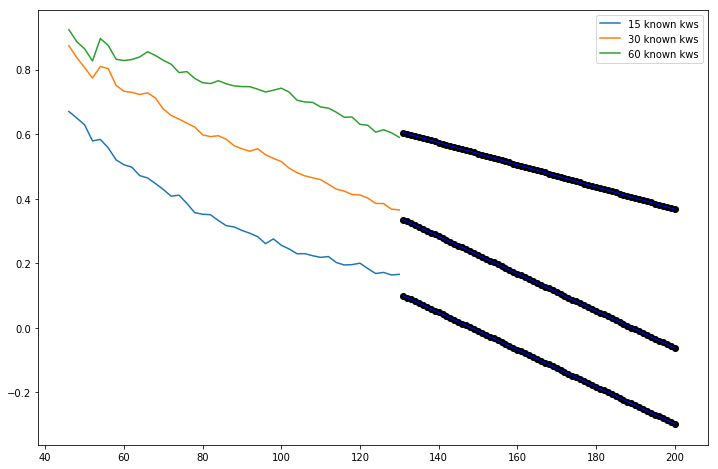

In [13]:
# All data points
X_train = np.array(list(range(46, 131, 2))).reshape(-1, 1)

# Outside of training dataset
X_extrapolate = np.array(list(range(131, 201, 1))).reshape(-1, 1)

for dataset, nb_known in [(df_15_acc, '15'), (df_30_acc, '30'), (df_60_acc, '60')]:
    # Split the targets into training/testing sets
    dataset_y_train = np.array(dataset).reshape(-1, 1)

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, dataset_y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_extrapolate)
    
    # Plot outputs
    plt.plot(dataset, label=f"{nb_known} known kws")
    plt.scatter(X_extrapolate, y_pred,  color='black')
    plt.plot(X_extrapolate, y_pred, color='blue', linewidth=1)

plt.legend()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


[ 1.46937615e+07  1.92032954e+07 -2.18468599e-04] [[1.12740862e+26 1.47341182e+26 2.53456184e+07]
 [1.47341182e+26 1.92560386e+26 3.31242241e+07]
 [2.53456183e+07 3.31242245e+07 5.50370437e-11]]
[ 6.46905152e+06  7.00861359e+06 -1.18948154e-04] [[-7.94938566e+24 -8.61241877e+24 -1.30046264e+07]
 [-8.61241877e+24 -9.33075337e+24 -1.40893011e+07]
 [-1.30046263e+07 -1.40893009e+07 -1.40170695e-11]]
[ 7.05622710e+05  7.57593965e+05 -5.29258560e-05] [[2.99361982e+22 3.21411322e+22 2.95335065e+06]
 [3.21411322e+22 3.45084693e+22 3.17087806e+06]
 [2.95335065e+06 3.17087805e+06 2.94095828e-10]]


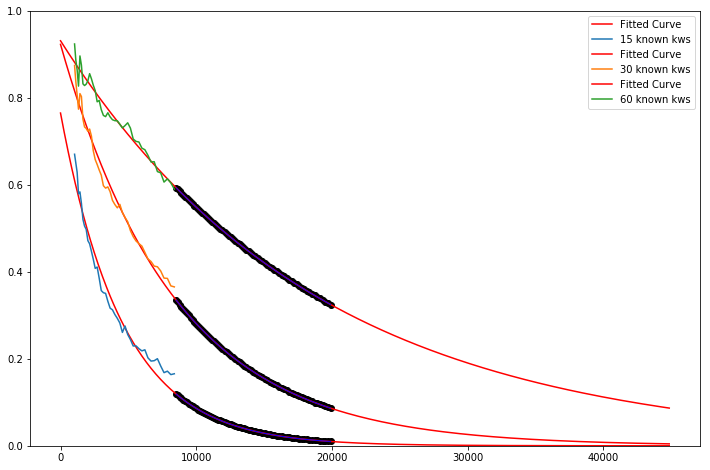

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x,L,c,k):
    return L/ (1 + c*np.exp(-k*x))

# def func(x, a, b, c):
#     return a * np.exp(-b * x) + c

# def func(x, a, b):
#     return a * np.exp(-b * x)

# All data points
X_train = np.array(list(range(46, 131, 2)))
X_train = [x*(x+1)/2 - x for x in X_train]

# Outside of training dataset
X_extrapolate = np.array(list(range(131, 201, 1)))
X_extrapolate = [x*(x+1)/2 - x for x in X_extrapolate]

#
Xs = np.array(list(range(0, 301, 1)))
Xs = [x*(x+1)/2 - x for x in Xs]

for dataset, nb_known in [(df_15_acc, '15'), (df_30_acc, '30'), (df_60_acc, '60')]:
    # Split the targets into training/testing sets
    dataset_y_train = np.array(dataset)

    popt, pcov = curve_fit(func, X_train, dataset_y_train, p0 = [10, 1e-10, 1e-7], maxfev=120000)
    
    print(popt, pcov)
    
    plt.plot(Xs, [func(x, *popt) for x in Xs], 'r-', label="Fitted Curve")
    
    # Plot outputs
    plt.plot(X_train, dataset, label=f"{nb_known} known kws")
    plt.scatter(X_extrapolate, [func(x, *popt) for x in X_extrapolate],  color='black')
    plt.plot(X_extrapolate, [func(x, *popt) for x in X_extrapolate], color='blue', linewidth=1)

plt.ylim(bottom=0.0, top=1.0)
plt.legend()
plt.show()


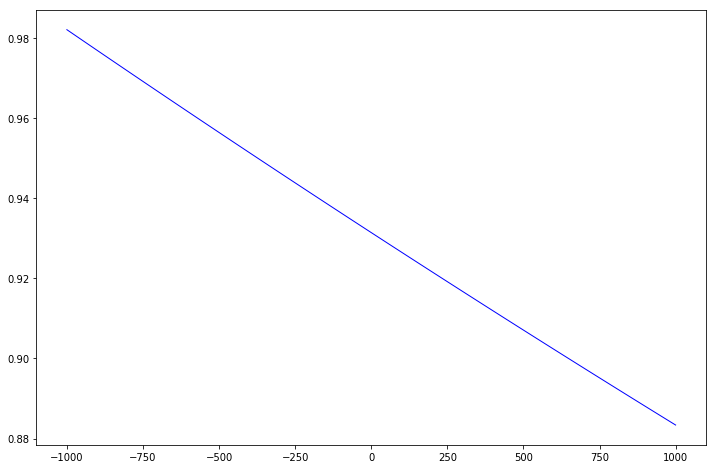

In [15]:
X_extrapolate = np.linspace(-1000, 1000, 100)

plt.plot(X_extrapolate, [func(x, *popt) for x in X_extrapolate], color='blue', linewidth=1)
plt.show()

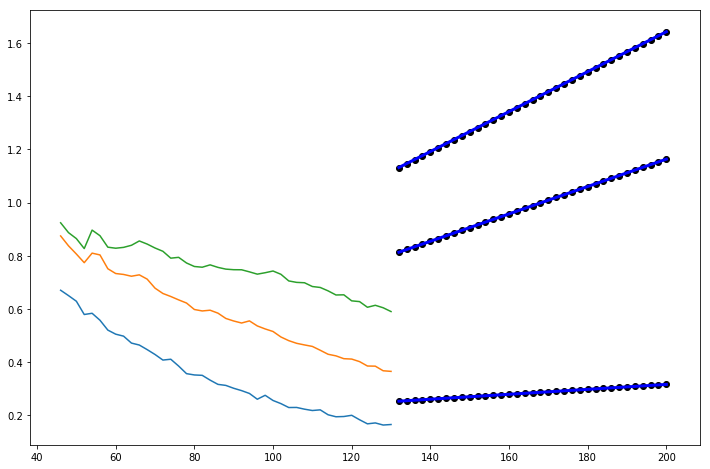

In [16]:
from sklearn.neural_network import MLPRegressor

# All data points
X_train = np.array(xs).reshape(-1, 1)

# Outside of training dataset
X_extrapolate = np.array(list(range(132, 202, 2))).reshape(-1, 1)

for dataset, nb_known in [(df_15_acc, '15'), (df_30_acc, '30'), (df_60_acc, '60')]:
    # Split the targets into training/testing sets
    y_train = np.array(dataset).reshape(-1, 1)

    # Create linear regression object
    regr = MLPRegressor(random_state=10, max_iter=500).fit(X_train, y_train.ravel())

    # Make predictions using the testing set
    y_pred = regr.predict(X_extrapolate)
    
    # Plot outputs
    plt.plot(dataset, label=f"{nb_known} known kws")
    plt.scatter(X_extrapolate, y_pred,  color='black')
    plt.plot(X_extrapolate, y_pred, color='blue', linewidth=3)

plt.show()

In [ ]:
from sklearn.linear_model import SGDRegressor

# All data points
X_train = np.array(xs).reshape(-1, 1)

# Outside of training dataset
X_extrapolate = np.array(list(range(92, 202, 2))).reshape(-1, 1)

for dataset, nb_known in [(df_15_acc, '15'), (df_30_acc, '30'), (df_60_acc, '60')]:
    # Split the targets into training/testing sets
    y_train = np.array(dataset).reshape(-1, 1)

    # Create linear regression object
    regr = SGDRegressor(max_iter=1000000000, tol=0.0000001)
    
    regr.fit(X_train, y_train.ravel())

    # Make predictions using the testing set
    y_pred = regr.predict(X_extrapolate)
    
    # Plot outputs
    plt.plot(dataset, label=f"{nb_known} known kws")
    plt.scatter(X_extrapolate, y_pred,  color='black')
    plt.plot(X_extrapolate, y_pred, color='blue', linewidth=3)

plt.show()

In [ ]:
# All data points
X_train = np.array(xs)

# Outside of training dataset
X_extrapolate = np.array(list(range(132, 202, 2))).reshape(-1, 1)


for dataset, nb_known in [(df_15_acc, '15'), (df_30_acc, '30'), (df_60_acc, '60')]:
    y_train = np.array(dataset)
    
    mymodel = np.poly1d(np.polyfit(X_train, y_train, 3))

    myline = np.linspace(48, 200, 100)

    plt.scatter(X_train, y_train)
    plt.plot(myline, mymodel(myline))
plt.show()

## 